# 가위바위보 분류기를 만들자.
라이브러리 버전을 확인해 봅니다.
***
사용할 라이브러리 버전을 둘러봅시다.


In [1]:
import tensorflow as tf
import numpy as np
import os 

print(tf.__version__)
print(np.__version__)


2.6.0
1.22.2


# 디렉토리 만들기
이제 클라우드에 실습용 디렉토리 rock_scissor_paper 및 하위 디렉토리들을 만들어, 데이터셋을 올릴 차례입니다!


# 디렉토리 만들기  
$ mkdir -p ~/aiffel/rock_scissor_paper/scissor  

$ mkdir -p ~/aiffel/rock_scissor_paper/rock  

$ mkdir -p ~/aiffel/rock_scissor_paper/paper  


$ ls -l ~/aiffel/rock_scissor_paper

# 클라우드 이미지 압축 해제
압축 해제를 하려면 Cloud shell을 열고 아래 명령어를 입력해주세요.

# 원하는 디렉토리로 이동 =3
$ cd  ~/aiffel/rock_scissor_paper/rock  

# 압축 해제 명령어 : unzip <파일명>.zip  

$ unzip rock.zip  

# 가위, 보에 대해서도 똑같이 실행!

$ cd  ~/aiffel/rock_scissor_paper/scissor 

$ unzip scissor.zip  

$ cd  ~/aiffel/rock_scissor_paper/paper  

$ unzip paper.zip  

# 데이터 불러오기  + Resize 하기
숫자 손글씨의 경우 이미지 크기가 28x28 이었기 때문에, 우리의 가위, 바위, 보 이미지도 28x28로 만들어야 합니다. 이를 위해서는 PIL 라이브러리를 사용해볼 거예요. 그러려면 먼저 라이브러리를 불러와야 겠죠?


In [2]:
from PIL import Image
import glob

print("PIL 라이브러리 import 완료!")

PIL 라이브러리 import 완료!


In [3]:
def resize_images(img_path):
	images=glob.glob(img_path + "/*.jpg")  
    
	print(len(images), " images to be resized.")

    # 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
	target_size=(28,28)
	for img in images:
		old_img=Image.open(img)
		new_img=old_img.resize(target_size,Image.ANTIALIAS)
		new_img.save(img, "JPEG")
    
	print(len(images), " images resized.")
	
# 가위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/scissor"
resize_images(image_dir_path)

print("가위 이미지 resize 완료!")

200  images to be resized.
200  images resized.
가위 이미지 resize 완료!


In [4]:
# 바위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/rock"

# 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
resize_images(image_dir_path)

200  images to be resized.
200  images resized.


In [5]:
# 보 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/paper"

# 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
resize_images(image_dir_path)

200  images to be resized.
200  images resized.


# load_data() 함수로 데이터 읽어오기
3개의 클래스 즉   
가위:0, 바위:1, 보:2 로 라벨링이 됨

In [6]:
import numpy as np

def load_data(img_path, number_of_data=600):  # 가위바위보 이미지 개수 총합에 주의하세요.
    # 가위 : 0, 바위 : 1, 보 : 2
    img_size=28
    color=3
    #이미지 데이터와 라벨(가위 : 0, 바위 : 1, 보 : 2) 데이터를 담을 행렬(matrix) 영역을 생성합니다.
    imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
    labels=np.zeros(number_of_data,dtype=np.int32)

    idx=0
    for file in glob.iglob(img_path+'/scissor/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=0   # 가위 : 0
        idx=idx+1

    for file in glob.iglob(img_path+'/rock/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=1   # 바위 : 1
        idx=idx+1  
    
    for file in glob.iglob(img_path+'/paper/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=2   # 보 : 2
        idx=idx+1
        
    print("학습데이터(x_train)의 이미지 개수는", idx,"입니다.")
    return imgs, labels

image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper"
(x_train, y_train)=load_data(image_dir_path)
x_train_norm = x_train/255.0   # 입력은 0~1 사이의 값으로 정규화

print("x_train shape: {}".format(x_train.shape))
print("y_train shape: {}".format(y_train.shape))

학습데이터(x_train)의 이미지 개수는 600 입니다.
x_train shape: (600, 28, 28, 3)
y_train shape: (600,)


이미지 한번 불러오기

라벨:  0


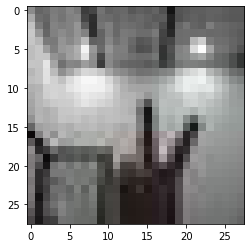

In [7]:
import matplotlib.pyplot as plt
plt.imshow(x_train[0])
print('라벨: ', y_train[0])


# 딥러닝 네트워크 설계하기

In [8]:
import tensorflow as tf
from tensorflow import keras
import numpy as np

# model을 직접 만들어 보세요.
model=keras.models.Sequential()
model.add(keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(28,28,3)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(32, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(32, activation='relu'))
model.add(keras.layers.Dense(3, activation='softmax'))

print('Model에 추가된 Layer 개수: ', len(model.layers))

model.summary()

Model에 추가된 Layer 개수:  7
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 16)        448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
flatten (Flatten)            (None, 800)               0         
_________________________________________________________________
dense (Dense)                (None, 32)                25632     
_________________________________________________________________
dense_1 (Dense)              (No

# 딥러닝 네트워크 학습시키기


In [9]:
# model을 학습시키는 코드를 직접 작성해 보세요.
# Hint! model.compile()과 model.fit()을 사용
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

model.fit(x_train, y_train, epochs=10)

Epoch 1/10
19/19 [==============================] - 1s 18ms/step - loss: 5.4947 - accuracy: 0.5400
Epoch 2/10
19/19 [==============================] - 0s 20ms/step - loss: 0.6385 - accuracy: 0.7950
Epoch 3/10
19/19 [==============================] - 0s 18ms/step - loss: 0.2694 - accuracy: 0.8783
Epoch 4/10
19/19 [==============================] - 0s 18ms/step - loss: 0.1953 - accuracy: 0.9250
Epoch 5/10
19/19 [==============================] - 0s 20ms/step - loss: 0.1295 - accuracy: 0.9550
Epoch 6/10
19/19 [==============================] - 0s 18ms/step - loss: 0.0859 - accuracy: 0.9667
Epoch 7/10
19/19 [==============================] - 0s 19ms/step - loss: 0.0494 - accuracy: 0.9883
Epoch 8/10
19/19 [==============================] - 0s 20ms/step - loss: 0.0311 - accuracy: 0.9967
Epoch 9/10
19/19 [==============================] - 0s 18ms/step - loss: 0.0261 - accuracy: 0.9983
Epoch 10/10
19/19 [==============================] - 0s 19ms/step - loss: 0.0177 - accuracy: 0.9967


# 얼마나 잘 만들었는지 확인하기(테스트)
***
300장의 가위바위보 이미지를 만들어 모두 학습에 사용했음.  
그러므로 테스트 데이터가 없음. 옆 친구의 이미지 데이터 300장을 받아오기.  
그것을 테스트 데이터로 하여 test accuracy를 측정하기. 

In [10]:
# test 디렉토리를 생성해서, 친구에게 받은 데이터를 업로드해보세요.
# ! mkdir -p ~/aiffel/rock_scissor_paper/test

In [11]:
# x_test, y_test를 만드는 방법은 x_train, y_train을 만드는 방법과 아주 유사합니다.
# [[YOUR CODE]]

# 이미지 크기 바꾸기 28X28사이즈로. (바위)
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/test/rock_test"
resize_images(image_dir_path)
# (가위)
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/test/scissor_test"
resize_images(image_dir_path)
# (보)
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/test/paper_test"
resize_images(image_dir_path)


# load_data 함수 만들기(테스트용)
import numpy as np

def load_data(img_path, number_of_data=300):  # 가위바위보 이미지 개수 총합에 주의하세요.
    # 가위 : 0, 바위 : 1, 보 : 2
    img_size=28
    color=3
    #이미지 데이터와 라벨(가위 : 0, 바위 : 1, 보 : 2) 데이터를 담을 행렬(matrix) 영역을 생성합니다.
    imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
    labels=np.zeros(number_of_data,dtype=np.int32)

    idx=0
    for file in glob.iglob(img_path+'/scissor_test/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=0   # 가위 : 0
        idx=idx+1

    for file in glob.iglob(img_path+'/rock_test/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=1   # 바위 : 1
        idx=idx+1  
    
    for file in glob.iglob(img_path+'/paper_test/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=2   # 보 : 2
        idx=idx+1
        
    print("테스트 데이터(x_test)의 이미지 개수는", idx,"입니다.")
    return imgs, labels

image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/test"
(x_test, y_test)=load_data(image_dir_path)
x_test_norm = x_test/255.0   # 입력은 0~1 사이의 값으로 정규화

print("x_test shape: {}".format(x_test.shape))
print("y_test shape: {}".format(y_test.shape))

100  images to be resized.
100  images resized.
100  images to be resized.
100  images resized.
100  images to be resized.
100  images resized.
테스트 데이터(x_test)의 이미지 개수는 300 입니다.
x_test shape: (300, 28, 28, 3)
y_test shape: (300,)


# 더 좋은 네트워크 만들어보기
시험용 데이터 x_test에 대한 인식률 test accuracy가 train accuracy 보다 낮게 나오는 것을 개선하기.


In [12]:
# model을 학습시키는 코드를 직접 작성해 보세요.
# Hint! model.evaluate()을 사용해 봅시다.

# 바꿔 볼 수 있는 하이퍼파라미터들
n_channel_1=32
n_channel_2=64
n_dense=64
n_train_epoch=20

model=keras.models.Sequential()
model.add(keras.layers.Conv2D(n_channel_1, (3,3), activation='relu', input_shape=(28,28,3)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(n_channel_2, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(n_dense, activation='relu'))
model.add(keras.layers.Dense(3, activation='softmax'))

model.summary()
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

# 모델 훈련
model.fit(x_train, y_train, epochs=n_train_epoch)

# 모델 시험
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=2)
print("test_loss: {} ".format(test_loss))
print("test_accuracy: {}".format(test_accuracy))

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 26, 26, 32)        896       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1600)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)                102464    
_________________________________________________________________
dense_3 (Dense)              (None, 3)                

# 회고

처음에 데이터를 학습 시키고 학습시킨 모델을 테스트 했을때 40~50프로의 정확도를 보였다.  
목표는 60프로 이상의 정확도를 보이는 것으로, 하이퍼파라미터를 바꾸거나 모델의 학습에 들어가는 데이터를 늘려주는 것으로 실험을 하였다.  
하이퍼 파라미터만 조절했을때는 정확도가 크게 변화가 없었다.  
그러나 학습시킬 이미지의 양을 300개에서 600개로 늘린 후에 다시 해본 결과 61프로의 정확도가 나왔다.
새로운 데이터를 테스트해서 평가하는 것이 쉽지 만은 않은것 같다.  
같은 환경에서도 정확도가 달라지는 상황이 생기기 때문에 운? 적인 요소도 있는 것 같다.  
어쨋든 좀 더 똑똑한 모델을 만드는데 있어서 중요한 요소는 하이퍼 파라미터와 학습할 데이터의 양인 것을 확인하였다.  